Experiment with my old automatic White Island lake level estimator
--

**This does not look to be very useful as the brightness of the scene near the lake boundary is quite variable. Discard this idea**

In [125]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy.signal
import numpy as np

%matplotlib inline

**Decide crop**

This is a vertical 1 pixel wide strip that crosses the lake boundary

In [126]:
#img = cv2.imread('/home/sherburn/Dropbox/work/2018.059.0210.02.WIWR.jpg')
img = cv2.imread('/home/sherburn/Dropbox/work/20180101000002WIWR.jpg')

In this image the lake boundary is at about y=530

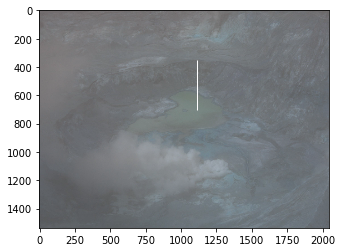

In [127]:
fig,ax = plt.subplots(1)
ax.imshow(img)
rect = patches.Rectangle((1110,350),1,350,linewidth=1,edgecolor='white',facecolor='white')
ax.add_patch(rect)

In [128]:
crop = img[350:700,1110:1111]

**From now on we work with the crop**

In the crop the lake boundary is at about y= 570 - 350 = 220

**gray image**

Its apparent here that there is a lot of changes in brightness on the bank above the lake. This is not good for detecting a chanes where the lake starts

In [129]:
gcrop = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)

Text(0.5,1,'Raw data')

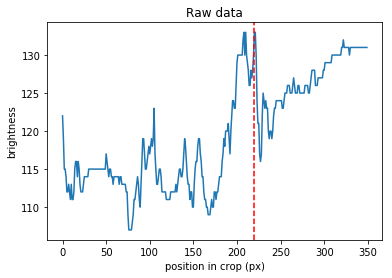

In [137]:
fig,ax = plt.subplots(1)
ax.plot(gcrop)
ax.set_ylabel('brightness')
ax.set_xlabel('position in crop (px)')
ax.axvline(220, color='red', linestyle='--')
ax.set_title('Raw data')

**colour image**

There is no benefit in looking at the different colour channels, there are still large high-frequency signals above the lake.

In [131]:
b,g,r = cv2.split(crop)

Text(0.5,1,'Raw data')

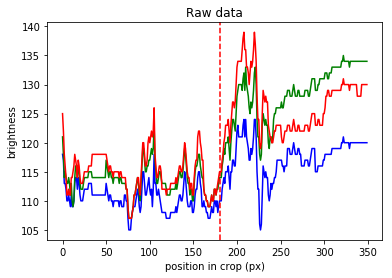

In [132]:
fig,ax = plt.subplots(1)
ax.plot(b, color='blue')
ax.plot(g, color='green')
ax.plot(r, color='red')
ax.set_ylabel('brightness')
ax.set_xlabel('position in crop (px)')
ax.axvline(180, color='red', linestyle='--')
ax.set_title('Raw data')

**back to gray image**

apply a median filer to the data

In [133]:
kernel = 39
gcrop = gcrop.flatten()
filt = scipy.signal.medfilt(gcrop, kernel)

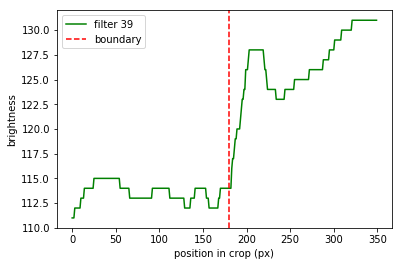

In [134]:
fig,ax = plt.subplots(1)
ax.plot(filt, color='green', label='filter '+str(kernel))

ax.set_ylabel('brightness')
ax.set_xlabel('position in crop (px)')
ax.axvline(180, color='red', linestyle='--', label='boundary')
ax.legend(loc='best')

gradient the filtered data

In [135]:
gradf = np.diff(filt)

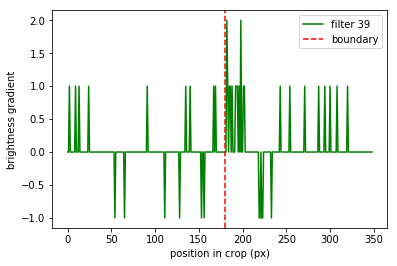

In [136]:
fig,ax = plt.subplots(1)
ax.plot(gradf, color='green', label='filter '+str(kernel))

ax.set_ylabel('brightness gradient')
ax.set_xlabel('position in crop (px)')
ax.axvline(180, color='red', linestyle='--', label='boundary')
ax.legend(loc='best')